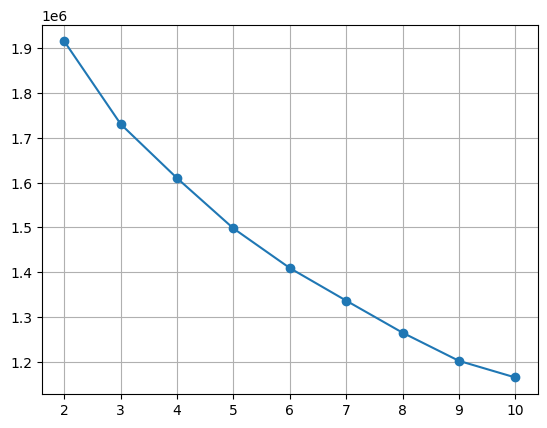

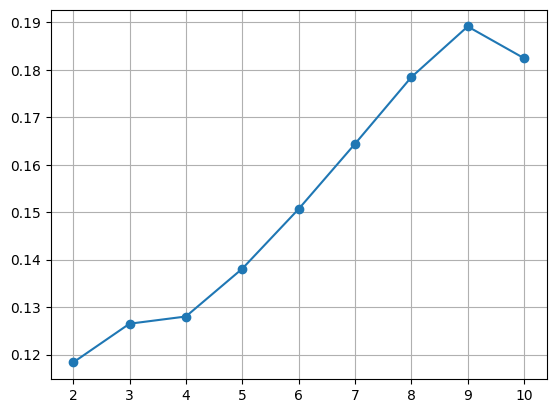

KMeans
Time used:  0.082000732421875
4    180
8    228
7    407
1    164
3    183
6    204
5     94
2    181
0    156
Name: Cluster, dtype: int64


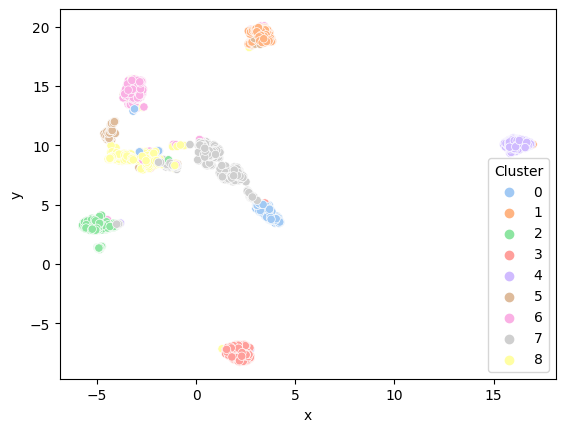

Agglomerative Clustering
Time used:  0.10599946975708008
7    178
0    284
1    331
5    178
6    181
3    186
8     80
2    198
4    181
Name: Cluster, dtype: int64


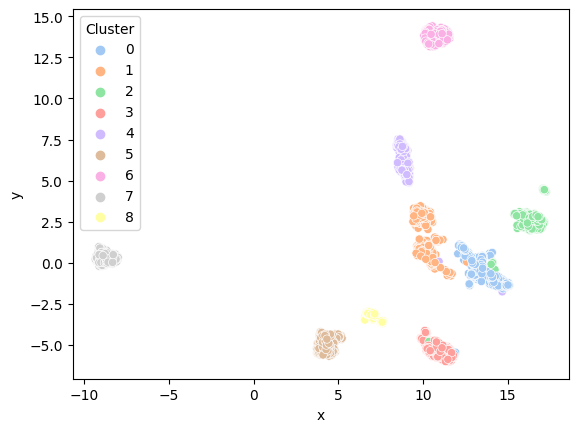

DBSCAN
Time used:  0.01999807357788086
 0    1737
-1      60
Name: Cluster, dtype: int64


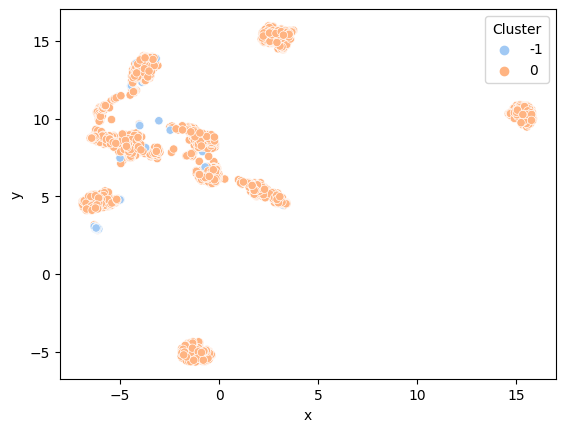

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

def two(df, scale):
    models = []
    score1 = []
    score2 = []
    for i in range(2,11):
        model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(df)
        models.append(model)
        score1.append(model.inertia_)
        score2.append(silhouette_score(df,model.labels_))
    plt.grid()
    plt.plot(np.arange(2,11), score1, marker='o')
    plt.show()
    plt.grid()
    plt.plot(np.arange(2,11), score2, marker='o')
    plt.show()
    time_start = time.time()
    model1 = KMeans(n_clusters=9, random_state=123, init='k-means++').fit(df)
    print("KMeans\nTime used: ", time.time() - time_start)
    df['Cluster'] = model1.labels_
    print(df['Cluster'].value_counts(sort=False))
    scaled = pd.DataFrame(scale.fit_transform(df), columns=df.columns)
    um = umap.UMAP(n_neighbors=50, min_dist=0.1, random_state=123).fit_transform(scaled)
    DATA = scaled.copy()
    DATA['x']=um[:,0]
    DATA['y']=um[:,1]
    sns.scatterplot(x='x',y='y',hue=df['Cluster'],data=DATA,palette='pastel')
    plt.show()

def three(df, scale):
    time_start = time.time()
    model2 = AgglomerativeClustering(9, compute_distances=True).fit(df)
    print("Agglomerative Clustering\nTime used: ", time.time() - time_start)
    df['Cluster'] = model2.labels_
    print(df['Cluster'].value_counts(sort=False))
    scaled = pd.DataFrame(scale.fit_transform(df), columns=df.columns)
    um = umap.UMAP(n_neighbors=50, min_dist=0.1, random_state=123).fit_transform(scaled)
    DATA = scaled.copy()
    DATA['x']=um[:,0]
    DATA['y']=um[:,1]
    sns.scatterplot(x='x',y='y',hue=df['Cluster'],data=DATA,palette='pastel')
    plt.show()

def four(df, scale):
    time_start = time.time()
    model3 = DBSCAN(eps=14, min_samples=5).fit(df)
    print("DBSCAN\nTime used: ", time.time() - time_start)
    df['Cluster'] = model3.labels_
    print(df['Cluster'].value_counts(sort=False))
    scaled = pd.DataFrame(scale.fit_transform(df), columns=df.columns)
    um = umap.UMAP(n_neighbors=50, min_dist=0.1, random_state=123).fit_transform(scaled)
    DATA = scaled.copy()
    DATA['x']=um[:,0]
    DATA['y']=um[:,1]
    sns.scatterplot(x='x',y='y',hue=df['Cluster'],data=DATA,palette='pastel')
    plt.show()

if __name__ == '__main__':
    data = load_digits(as_frame=True)
    scaler = preprocessing.MinMaxScaler()
    two(data.data, scaler)
    three(data.data, scaler)
    four(data.data, scaler)